# Documentation for Using the Traffic Model

This guide provides instructions on using the traffic model within a Jupyter notebook. The model is designed to simulate traffic dynamics based on predefined rules. Below are the steps to import and utilize the toy model as an example, which follows the basic rules outlined in the project brief.

## Importing the Model

To use the traffic model, start by importing the required class. In this example, we'll use the toy model provided. Ensure the model file (model_toy.py) is in the correct directory (model_class) or update the import statement with the correct path.

In [37]:
from model_class.model_toy_MN import TrafficSimulation
import pandas as pd
import matplotlib.pyplot as plt

## Initializing the Model

After importing the class, initialize an instance of the TrafficSimulation class with the desired parameters, such as road_length, density, and car_slow_down_prob.

Execute the simulation using a loop to update the model over a specified number of time steps. In this example, we run the simulation for 10 time steps:

In [33]:
# Your simulation parameters
road_length = 30
density = 0.22
car_slow_down_prob = 0.1
number_of_simulation_steps = 9

# Create an instance of TrafficSimulation
sim1 = TrafficSimulation(road_length, density, car_slow_down_prob)

# Run the simulation
for _ in range(number_of_simulation_steps):
    sim1.print_step()   # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    sim1.print_heat()

- - - - - - - - 0 - - - 0 - - 4 - - - - - - - - 1 1 - - - 4


AttributeError: 'TrafficSimulation' object has no attribute 'print_heat'

# Accessing Simulation Results

To retrieve information from the simulation, you can access data such as the number of laps completed and a histogram of the number of cars at  different speeds. Additionally, you can print this information using the following code:

In [12]:
# Print simulation results
print(f'Number of laps seen: {sim1.data_laps}')
print(f'Lap completion rate: {sim1.data_laps / number_of_simulation_steps}')
print(f'Dictionary of the number of cars at a speed:\n{sim1.data_speeds_histogram}')

Number of laps seen: 3
Lap completion rate: 0.3333333333333333
Dictionary of the number of cars at a speed:
{3: 3, 4: 1, 5: 2}


Note, that we can run data_speeds_histogram at each step, as the data changes per each time step, as an example:

In [14]:
# Run the simulation and print speed histograms at each step

dicts = []

for step in range(number_of_simulation_steps):
    sim1.print_step()  # Print the current state of the simulation
    sim1.update()      # Update the simulation for the next time step
    dicts.append(sim1.data_speeds_histogram)
    
    # Print speed histogram at each step
    print(f'Step {step + 1} - Dictionary of the number of cars at a speed:\n{sim1.data_speeds_histogram}')

- - - - - - 5 - - - - - 5 - - - - 3 - - 2 - - - 3 - - - - 4
Step 1 - Dictionary of the number of cars at a speed:
{5: 2, 4: 2, 2: 1, 3: 1}
- - - - 5 - - - - - - 5 - - - - 4 - - 2 - - - 3 - - - - 4 -
Step 2 - Dictionary of the number of cars at a speed:
{5: 1, 4: 3, 2: 1, 3: 1}
- - 4 - - - - - - 5 - - - - - 4 - - 2 - - - 3 - - - - 4 - -
Step 3 - Dictionary of the number of cars at a speed:
{5: 2, 2: 1, 3: 2, 4: 1}
- 4 - - - - - 5 - - - - - - 5 - - 2 - - - 3 - - - 3 - - - -
Step 4 - Dictionary of the number of cars at a speed:
{5: 2, 1: 1, 3: 2, 4: 1}
- - - - - - 5 - - - - - 5 - - 1 - - - - 3 - - - 3 - - - - 4
Step 5 - Dictionary of the number of cars at a speed:
{5: 2, 2: 2, 3: 2}
- - - - 5 - - - - - - 5 - - 2 - - 2 - - - - - 3 - - - 3 - -
Step 6 - Dictionary of the number of cars at a speed:
{5: 1, 1: 1, 2: 2, 3: 1, 4: 1}
- 4 - - - - - - - 5 - - 1 - - - 2 - - - 3 - - - - 2 - - - -
Step 7 - Dictionary of the number of cars at a speed:
{5: 1, 2: 2, 3: 3}
- - - - - - 5 - - - - 2 - - 2 - -

Iteration,0,1,2,3,4,5,6,7,8
Speed,,,,,,,,,
1,0,0,0,1,0,1,0,1,2
2,1,1,1,0,2,2,2,0,0
3,1,1,2,2,2,1,3,2,0
4,2,3,1,1,0,1,0,3,3
5,2,1,2,2,2,1,1,0,1


array([<Axes: title={'center': '0'}, xlabel='Speed'>,
       <Axes: title={'center': '1'}, xlabel='Speed'>,
       <Axes: title={'center': '2'}, xlabel='Speed'>,
       <Axes: title={'center': '3'}, xlabel='Speed'>,
       <Axes: title={'center': '4'}, xlabel='Speed'>,
       <Axes: title={'center': '5'}, xlabel='Speed'>,
       <Axes: title={'center': '6'}, xlabel='Speed'>,
       <Axes: title={'center': '7'}, xlabel='Speed'>,
       <Axes: title={'center': '8'}, xlabel='Speed'>], dtype=object)

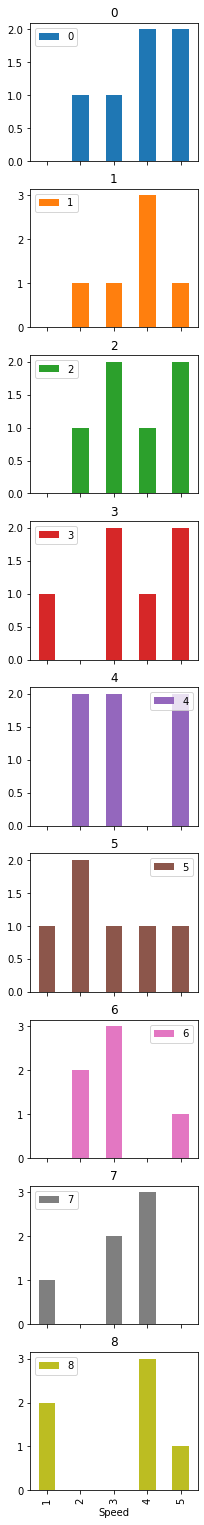

In [15]:
dicts_df = pd.DataFrame.from_dict(dicts)
dicts_df.index.names = ['Iteration']
dicts_df = dicts_df.reindex(sorted(dicts_df.columns), axis=1)
dicts_df = dicts_df.fillna(0)
dicts_df = dicts_df.transpose()
dicts_df.index.names = ["Speed"]
dicts_df = dicts_df.astype(int)
dicts_df.columns = dicts_df.columns.astype(str)


# g = sns.FacetGrid(tips, col="time",  row="sex")
# g.map(sns.scatterplot, "total_bill", "tip")
display(dicts_df)
# fig, ax = plt.subplots(len(dicts_df.columns),1, figsize = (3, 27))
dicts_df.plot.bar(subplots=True, figsize = (3, 27))        

This modification to the code prints the speed histogram at each time step, allowing you to observe the evolving distribution of car speeds throughout the simulation. Adjust the number_of_simulation_steps variable based on the actual number of steps used in your simulation. Feel free to further customize the output or include additional information as needed for your analysis.

I have built some test functions for the rule sets which can be called as: Note they will over ride some parameters are required.

In [38]:
road_length = 30
density = 0.22
car_slow_down_prob = 0.1
number_of_simulation_steps=10
sim1.test_simple_acceleration(0)    # set the model for the test, with the variable being pass is the car_slow_down_prob
road_outputs = []
# Run the simulation
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    sim1.print_heat()

0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


AttributeError: 'TrafficSimulation' object has no attribute 'print_heat'

In [8]:
sim1.test_simple_acceleration(0.5)    # set the model for the test, with the variable being pass is the starting speed.
# Run the simulation
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - 3 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [19]:
sim1.test_simple_deceleration(0)  # Variable is the starting speed
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - 0 - - - - -
- 1 - - 0 - - - - -
- - - 2 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -


In [20]:
sim1.test_simple_deceleration(3)  # Variable is the starting speed
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

3 - - - 0 - - - - -
- - - 3 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -


In [22]:
# we can also change the  stationary car position with the second argument
sim1.test_simple_deceleration(0, 8)  # Variable is the starting speed, stationary car position
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - - - - - 0 -
- 1 - - - - - - 0 -
- - - 2 - - - - 0 -
- - - - - - 3 - 0 -
- - - - - - - 1 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -


#  Variable speed testing 
For this we need to import the updated model as before we import it:

In [91]:
from model_class.model_variable_speed_limits import TrafficSimulation as VariableSpeedTrafficSimulation

In [103]:
road_speed_limit_list = ([3]*20 ) + ([8]*20) # You can create a list like this [speed_limit of road] * (how many blocks)
density = 1/5
car_slow_down_prob = .25
sim1 = VariableSpeedTrafficSimulation(road_speed_limit_list, density, car_slow_down_prob)
# sim1.test_variable_speed_limits(6,4)
sim1.print_speed_limits()
for _ in range(1):
    sim1.print_step()
    sim1.update()

3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
- - - - - - - - - - - - - 2 - - - 3 - 0 - - - - - 0 - - 3 2 1 - - - - 1 - - - -
<class 'NoneType'>
